In [1]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)
print(len(wine_dataframe))
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)

35218


In [3]:
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)
print(wine_dataframe.describe())

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


       Léger to Puissant  Souple to Tannique  Sec to Moelleux  Doux to Acide
count       35218.000000        35218.000000     35218.000000   35218.000000
mean           39.965001           19.491293        19.386413      37.882006
std            29.311771           23.718340        15.306354      28.274971
min             0.000000            0.000000         0.000000       0.000000
25%             0.000000            0.000000         0.000000       0.000000
50%            51.000000            0.000000        23.578555      50.105424
75%            63.804147           40.940347        30.224412      59.500000
max            85.000000           85.000000        85.000000      85.000000


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)

# count the number of observations per variety
counts = df_concatenated['Cépages'].value_counts()

# print the counts
print(counts)

Pinot noir            8378
Cabernet-Sauvignon    8127
Chardonnay            8108
Riesling              3274
Merlot                3111
Malbec                1582
Sangiovese            1414
Zinfandel             1224
Name: Cépages, dtype: int64


In [5]:
mask = (df_concatenated['Léger to Puissant'] != 0) | (df_concatenated['Souple to Tannique'] != 0) | (df_concatenated['Sec to Moelleux'] != 0) | (df_concatenated['Doux to Acide'] != 0)
df_concatenated = df_concatenated[mask]
counts = df_concatenated['Cépages'].value_counts()
print(counts)

Pinot noir            5888
Chardonnay            5633
Cabernet-Sauvignon    4405
Riesling              2820
Merlot                2209
Malbec                1263
Zinfandel              940
Sangiovese             790
Name: Cépages, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']
#X = X.values
#y = y.tolist()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
print('X_train',len(X_train))
print('X_test',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train 21553
X_test 2395
y_train 21553
y_test 2395


# 2) PREDICT

In [7]:
classifier = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto')
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Cabernet-Sauvignon       0.86      0.94      0.90       427
        Chardonnay       0.95      0.98      0.96       590
            Malbec       0.86      0.87      0.87       110
            Merlot       0.90      0.79      0.84       228
        Pinot noir       0.99      0.95      0.97       597
          Riesling       0.96      0.95      0.96       275
        Sangiovese       0.86      0.83      0.84        75
         Zinfandel       0.93      0.89      0.91        93

          accuracy                           0.93      2395
         macro avg       0.91      0.90      0.91      2395
      weighted avg       0.93      0.93      0.93      2395



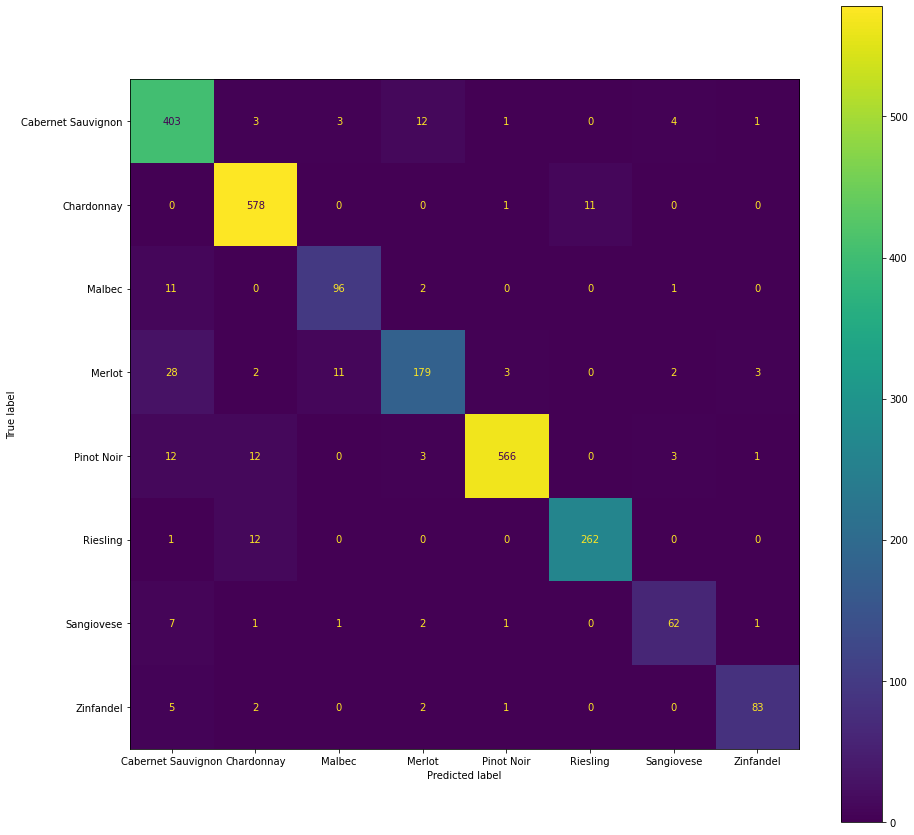

In [8]:
from sklearn import metrics
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Cabernet Sauvignon" ,"Chardonnay", "Malbec","Merlot","Pinot Noir","Riesling","Sangiovese","Zinfandel"])
cm_display.plot(ax=ax)
plt.savefig('wine_confusion_matrix.png', dpi=300)
plt.show()


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
param_grid = {'C': [100, 150, 200], 'kernel': ['rbf'], 'gamma': ['auto']}

In [28]:
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose = 4, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.955 total time=  31.7s
[CV 2/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.956 total time=  31.9s
[CV 3/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.957 total time=  32.2s
[CV 1/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.955 total time=  31.4s
[CV 2/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.956 total time=  33.1s
[CV 3/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.957 total time=  30.7s
[CV 1/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.955 total time=  31.8s
[CV 2/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.955 total time=  33.0s
[CV 3/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.957 total time=  33.0s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [100, 150, 200], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=4)

In [29]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.9563427650200443
